# Exercise 15

Related Notes:
- Chapter_09_Object_Oriented_Programming
- Exercise 14

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/njc-cz2-2021/Materials/blob/main/Exercises/Exercise-15-Object-Oriented-Programming-part-Deux.ipynb) 

For Exercises 15.1, refer back to the `Complex` class you defined in Exercise 14. 

## Exercise 15.1 2019/NJC/Tutorial 11: Complex Number(TBL)/A1

Simplify the following complex numbers in the Cartesian form, $x + iy$:

1. $\left(3-8i\right)\left(5+7i\right)$

2. $\frac{7+5i}{4-3i}$

### Ans: 

1.$71-19i$

2.$\frac{13}{25}+\frac{41}{25}i$ 

#### Answer

In [40]:
#YOUR_CODE_HERE
import math

class Complex():
    #Task 1
    def __init__(self,real: float , imag: float):
        self.real = real
        self.imag = imag
        
    def Re(self):
        return self.real
    
    def Im(self):
        return self.imag
    
    def mod(self):
        return math.sqrt(self.real**2 + self.imag**2)
    
    def arg(self):
        #Guard cases for certain scenarios
        if self.real == 0:
            if self.imag < 0:
                return -(math.pi/2)
            else:
                return math.pi/2
        if self.imag == 0:
            if self.real < 0:
                return math.pi
        #Quadrants 2 or 3
        if self.real < 0:
            #Quadrant 3
            if self.imag < 0:
                return math.atan(self.imag / self.real) - math.pi
            else:
                return math.atan(self.imag / self.real) + math.pi
        #Quadrant 1 or 4
        return math.atan(self.imag / self.real)

    def __str__(self):
        return f"{self.real} + {self.imag}i"
    
    #Task 2
    def __add__(self, c : complex):
        return Complex(self.real + c.real , self.imag + c.imag)
    
    def __sub__(self, c: complex):
        return Complex(self.real - c.real , self.imag - c.imag)
    
    def __mul__(self, c: complex):
        return Complex(self.real*c.real - self.imag*c.imag, (self.real*c.imag + c.real*self.imag))
    
    def __truediv__(self, c:complex):
        const = 1/(c.real**2 + c.imag**2)
        return Complex(const*(self.real*c.real + self.imag*c.imag), const*(c.real*self.imag - self.real*c.imag))
        
    
#Question 1
complex1 = Complex(3, -8)
print(complex1)
complex2 = Complex(5, 7)
print(complex2)
   #To reduce (3-8i)(5+7i)
print(complex1.__mul__(complex2))

#Question 2
complex3 = Complex(7,5)
print(complex3)
complex4 = Complex(4, -3)
print(complex4)
   #To reduce (7+5i)/(4-3i)
print(complex3.__truediv__(complex4))

3 + -8i
5 + 7i
71 + -19i
7 + 5i
4 + -3i
0.52 + 1.6400000000000001i


## Exercise 15.2 2019/NJC/Tutorial 11: Complex Number(TBL)/B1 (Modified)

Find the modulus and argument of the following complex numbers. 

1. $-2i$
2. $-1-i$
3. $-1+\sqrt{3}i$ 
4. $(-1-i)(-1+\sqrt{3}i)$
5. $\frac{-1+\sqrt{3}i}{-1-i}$
6. $-100$

### Ans: 

1. $2,-\frac{\pi}{2}$
2. $\sqrt{2},-\frac{3\pi}{4}$ 
3. $2,\frac{2\pi}{3}$
4. $2\sqrt{2},-\frac{\pi}{12}$
5. $\sqrt{2},-\frac{7\pi}{12}$
6. $100,\pi$

#### Answer

In [41]:
#YOUR_CODE_HERE
import math 

#Question 1
print("1)")
complex1 = Complex(0, -2)
print(complex1.mod())
print(complex1.arg())

#Question 2
print("2)")
complex2 = Complex(-1 , -1)
print(complex2.mod())
print(complex2.arg())

#Question 3
print("3)")
complex3 = Complex(-1 , math.sqrt(3))
print(complex3.mod())
print(complex3.arg())

#Question 4
print("4)")
complex4 =complex2.__mul__(complex3)
print(complex4.mod())
print(complex4.arg())

#Question 5
print("5)")
complex5 = (complex3.__truediv__(complex2))
print(complex5.mod())
print(complex5.arg())

#Question 6
print("6)")
complex6 = Complex(-100 , 0)
print(complex6.mod())
print(complex6.arg())




1)
2.0
-1.5707963267948966
2)
1.4142135623730951
-2.356194490192345
3)
1.9999999999999998
2.0943951023931957
4)
2.8284271247461903
-0.2617993877991494
5)
1.4142135623730951
-1.832595714594046
6)
100.0
3.141592653589793


## Exercise 15.3

The modulus and argument of a complex number gives us another way to understand complex number. Recall that if $z=x+iy$, from the diagram below, we have $|z|=r$ and $\text{arg}=\varphi$.

<center>
<img src="img/220px-Complex_number_illustration_modarg.svg.png" width="250" align="center"/>
</center>

What this means is that instead of locating a point in a 2D plane by comparing it via the displacement in the horizontal and vertical axes ($xy$-coordinates), we can describe the same point by referring to how far it is from the origin ($r$) and how much angle does it make with a reference axis ($\text{arg}$). 

In particular, from basic trigonometry, that $$x=r\cos\varphi, y=(r\sin \varphi).$$ Consequently, the same complex number $z$ can be represented as  $z=r\cos \varphi +i (r\sin \varphi)$.

The following code plots a quadrilateral where the points are stored in the list `coord`.

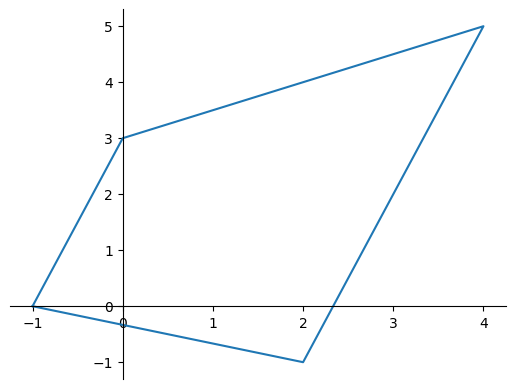

In [42]:
import matplotlib.pyplot as plt

coord = [[-1,0], [2,-1], [4,5], [0,3]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))


plt.plot(xs,ys) 
plt.show() # if you need...

For each of the following complex number $w$, 

- $\frac{\sqrt{2}}{2}+i\frac{\sqrt{2}}{2}$
- $-1+\sqrt{3}i$
- $-1.5$

do the following;

1. For each point in `coord`, 
    - convert it to a `Complex` object and multiply it with the complex number $w$,
    - convert the product back into a list that represent a point
    - append these points into the list `coord_transformed`
2. Plot the 2 quadrilaterals, one with points in `coord` and the other with points in `coord_transformed` on the same diagram.

What do you observe about the difference between quadrilaterals obtained from `coord` and `coord_transformed`?

#### Answer

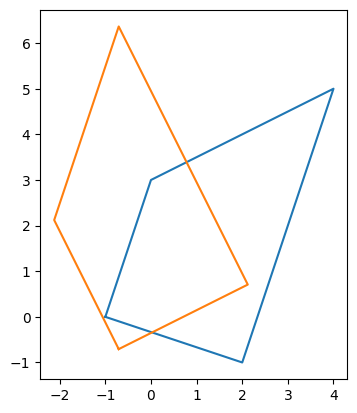

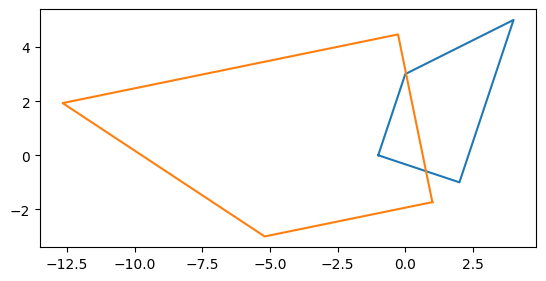

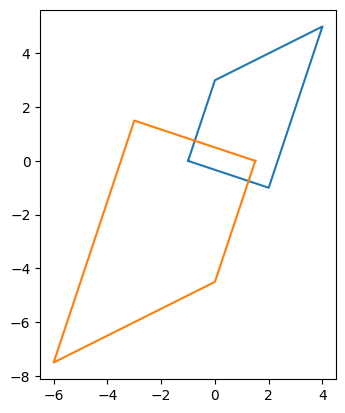

In [47]:
#YOUR_ANSWER_HERE
import math
import matplotlib.pyplot as plt

def plotcomplex(w):
    coord_transformed = []
    for x in coord[:-1]:
        a,b = x[0], x[1]
        complexcoord = Complex(a,b)
        coordnew = w.__mul__(complexcoord)
        realcoord = [coordnew.Re(),coordnew.Im()]
        coord_transformed.append(realcoord)

    coord_transformed.append(coord_transformed[0])

    xs, ys = zip(*coord) #create lists of x and y values
    xc, yc = zip(*coord_transformed)


    plt.axes().set_aspect(aspect='equal')
    plt.plot(xs,ys) 
    plt.plot(xc,yc)
    plt.show() # if you need...

#Question 1
w = Complex(math.sqrt(2)/2 , math.sqrt(2)/2 )
plotcomplex(w)

#Question 2
a = Complex(-1, math.sqrt(3))
plotcomplex(a)

#Question 3
b = Complex(-1.5 , 0)
plotcomplex(b)





    




>```
>Question 1
>Rotated slightly by a certain angle(theta) but similar in size
>
>Question 2
>The new quadilateral is rotated anticlockwise by 90 degrees, and is much larger size than the >regular quadilateral
>
>Question 3
>The new quadilateral is just an inverted version (rotated a full 180 degrees) of the old quadilateral and is bigger in size, >being symmetrical to the old quadilateral on a certain line (which i cannot determine)

## Exercise 15.4

In mathematics, a $2\times n$ **matrix** over $\mathbb{R}$ is a two-dimensional array whose entries are elements of $\mathbb{R}$ with 2 rows and $n$ columns. Here is an example of $2\times 2$ matrix: $$\left(\begin{array}{cc}
1 & 3\\
-10 & 30.5
\end{array}\right)$$

A program is to be written to implement basic matrix operations.

In Python, we can use a nested list to write a matrix, e.g. the matrix above can be represented as `[[1,3],[-10,30.5]]`.

A matrix is customarily denoted with a capital letter and the entry in the $i$ th row and $j$ th column in a matrix is denoted with the lowercase letter of the alphabet used for the matrix followed with the subscript $ij$, e.g if $M=\left(\begin{array}{cc}
1 & 3\\
-10 & 30.5
\end{array}\right)$, then the entry at 1st row and 2nd column is $m_{12}=3$.

Let $A$ and $B$ be matrices of the same dimensions, i.e. same number of rows and same number of columns, we define the *addition* $A+B=C$ as a matrix with the same number of rows and columns as $A$ and $B$ where for every entry in $C$, $c_{ij}=a_{ij}+b_{ij}$, e.g. $$\left(\begin{array}{ccc}
1 & 3 & 5\\
2 & 3 & 2
\end{array}\right)+\left(\begin{array}{ccc}
1 & 1 & 3\\
4 & 0 & 0
\end{array}\right)=\left(\begin{array}{ccc}
2 & 4 & 8\\
6 & 3 & 2
\end{array}\right).$$

Let $A$ and $B$ be $2\times 2$ and $2\times n$ matrices respectively,  we define the *product* $A*B=C$ as a $2\times n$ matrix such that for every $i,j$ th entry in $C$, $c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}$.

Let $A=\left(\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right)$ be a $2\times 2$ matrix, the *determinant* of $A$, denoted as $|A|$ is the value $a_{11}a_{22}-a_{12}a_{21}$ and if $|A|\neq 0$, the **inverse** of $A$, denoted as $A^{-1}$ is defined to be $$A^{-1}=\left(\begin{array}{cc}
\frac{a_{22}}{\left|A\right|} & \frac{-a_{12}}{\left|A\right|}\\
\frac{-a_{21}}{\left|A\right|} & \frac{a_{11}}{\left|A\right|}
\end{array}\right).$$

1. Implement the class `TwoByNMatrix` with the following design:


>```
>| TwoByNMatrix                |
>|-----------------------------|
>|  entry: ARRAY               |
>|-----------------------------|
>|  constructor(l : ARRAY)     |
>|  __add__(m : TwoByNMatrix)  |
>|  __mul__(m : TwoByNMatrix)  |
>|  det(): FLOAT               |
>|  inv(): TwoByNMatrix        |
>|-----------------------------|
>```

Test your code with the following test cases:

-  $\left(\begin{array}{ccc}
1 & 3 & 5\\
2 & 3 & 2
\end{array}\right)+\left(\begin{array}{ccc}
1 & 1 & 3\\
4 & 0 & 0
\end{array}\right)=\left(\begin{array}{ccc}
2 & 4 & 8\\
6 & 3 & 2
\end{array}\right)$

- $\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)\left(\begin{array}{ccc}
1 & 1 & 1\\
0 & 0 & 1
\end{array}\right)=\left(\begin{array}{ccc}
1 & 1 & 4\\
4 & 4 & 9
\end{array}\right)$

- $\left|\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)\right|=-7$
- $\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)^{-1}=-\frac{1}{7}\left(\begin{array}{cc}
5 & -3\\
-4 & 1
\end{array}\right)$

#### Answer

In [44]:
#YOUR_ANSWER_HERE
class TwoByNMatrix:
    def __init__(self, matrix: list):
        self.matrix = matrix
    
    def __add__(self, m):
        final = self.matrix
        for x in range(len(final)):
            for i in range(len(final[x])):
                self.matrix[x][i] += m.matrix[x][i]
        return final

    def __mul__(self, m):
        final = []
        for j in range(len(self.matrix)):
            mini = []
            for n in range(len(m.matrix[0])):
                mini.append(self.matrix[j][0]*m.matrix[0][n] + self.matrix[j][1]*m.matrix[1][n])
            final.append(mini)
        return final

    def det(self):
        return self.matrix[0][0]*self.matrix[1][1] - self.matrix[0][1]*self.matrix[1][0]
    
    def inv(self):
        return TwoByNMatrix([[self.matrix[1][1]/ self.det(), -self.matrix[0][1] / self.det()],
                             [-self.matrix[1][0]/ self.det(), self.matrix[0][0]/ self.det()]])
    
    def __str__(self):
        return f"Matrix is {self.matrix}"

        

#Question 1
matrix1 = TwoByNMatrix([[1,3,5],[2,3,2]])
matrix2 = TwoByNMatrix([[1,1,3],[4,0,0]])
print(matrix1.__add__(matrix2))

#Question 3
matrix3 = TwoByNMatrix([[1,3],[4,5]])
matrix4 = TwoByNMatrix([[1,1,1],[0,0,1]])
print(matrix3.__mul__(matrix4))

#Question 3
matrix5 = TwoByNMatrix([[1,3],[4,5]])
print(matrix5.det())
        
#Question 4 
print(matrix5.inv())


[[2, 4, 8], [6, 3, 2]]
[[1, 1, 4], [4, 4, 9]]
-7
Matrix is [[-0.7142857142857143, 0.42857142857142855], [0.5714285714285714, -0.14285714285714285]]


2. If $\left| A\right|\neq 0$, find $A*A^{-1}$ and $A^{-1}*A$. 

#### Answer

In [45]:
#YOUR_ANSWER_HERE
matrixA = TwoByNMatrix([[1,3],[4,5]])
print(matrixA.__mul__(matrixA.inv()))
print(matrixA.inv().__mul__(matrixA))

[[0.9999999999999999, 0.0], [-4.440892098500626e-16, 1.0]]
[[0.9999999999999999, 0.0], [0.0, 1.0]]


Question 2
>```
>A*A^-1 and A^-1*A is [[1,0],[0,1]]

3. The use of matrices can also be employed in 2D computer graphics as a way to rotate images. 

Let $(x,y)$ be a point on a plane that we want to rotate counterclockwise by $\theta$ radians about the origin. Then the new coordinates of the point is $(x',y')$ where $$\begin{array}{ccc}
x\cos\theta-y\sin\theta & = & x',\\
x\sin\theta+y\sin\theta & = & y'.
\end{array}$$ 

The system of equation can be written in the matrix form, $$\left(\begin{array}{cc}
\cos\theta & -\sin\theta\\
\sin\theta & \sin\theta
\end{array}\right)\left(\begin{array}{c}
x\\
y
\end{array}\right)=\left(\begin{array}{c}
x'\\
y'
\end{array}\right).$$

In separate diagrams, for every angle $\theta \in \left\{-\frac{\pi}{2},-\frac{3\pi}{4},\frac{2\pi}{3},\pi\right\}$:

A. rotate every points in the set $\left\{ \left(-1,0\right),\left(2,-1\right),\left(4,5\right),\left(0,3\right)\right\}$, 

B. plot the original points and the rotated points in the same diagram.

#### Answer

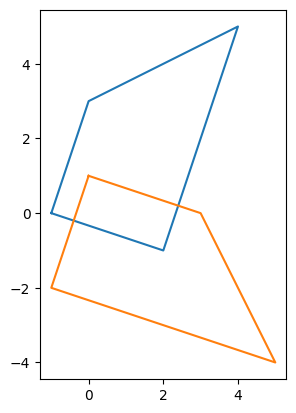

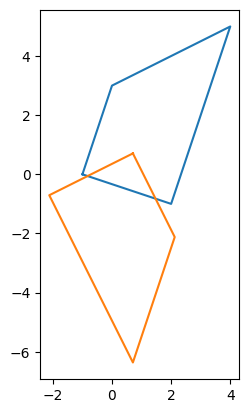

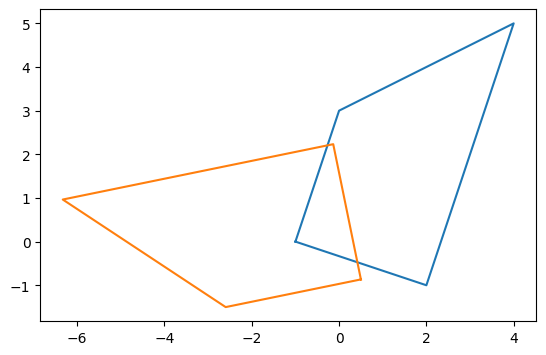

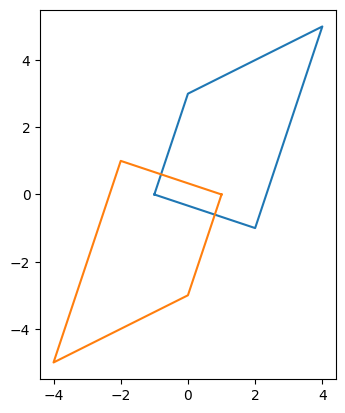

In [46]:
#YOUR_ANSWER_HERE
import math
import matplotlib.pyplot as plt


def rotation(coordinates, keter):
    rotatedpoints = []
    angle = TwoByNMatrix([[math.cos(keter), -math.sin(keter)],
                       [math.sin(keter), math.cos(keter)]])
    for n in coordinates:
        x,y = n
        coordmatrix = TwoByNMatrix([[x],[y]])
        rotatedpoints.append(angle.__mul__(coordmatrix))
    return rotatedpoints

def ploting(points,rotatingpoints):
    points.append(points[0])
    rotatingpoints.append(rotatingpoints[0])
    plotx, ploty = zip(*points)
    plotx2, ploty2 = zip(*rotatingpoints)
    

    plt.axes().set_aspect(aspect='equal')
    plt.plot(plotx,ploty)
    plt.plot(plotx2,ploty2)
    plt.show()
    


coords = [[-1,0], [2,-1], [4,5], [0,3]]
angles = [-math.pi/2 , -3*math.pi/4, 2*math.pi/3 , math.pi]
for x in angles:
    ploting(coords, rotation(coords,x))
